In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif' 
rcParams['figure.figsize'] = (10, 7)
rcParams['figure.dpi'] = 300
rcParams['axes.grid'] = True
rcParams['font.size'] = 14
# rcParams

In [3]:
with open("data_1.csv") as f:
    res = pd.read_csv(f)
    
with open("data_2.csv") as f:
    hist = pd.read_csv(f)

In [7]:
res

,f,out
0,17.09,7.9
1,18.38,8.1
2,21.80,9.1
3,24.10,9.3
4,27.00,8.8
5,31.00,10.9
6,35.40,12.0
7,39.80,3.9


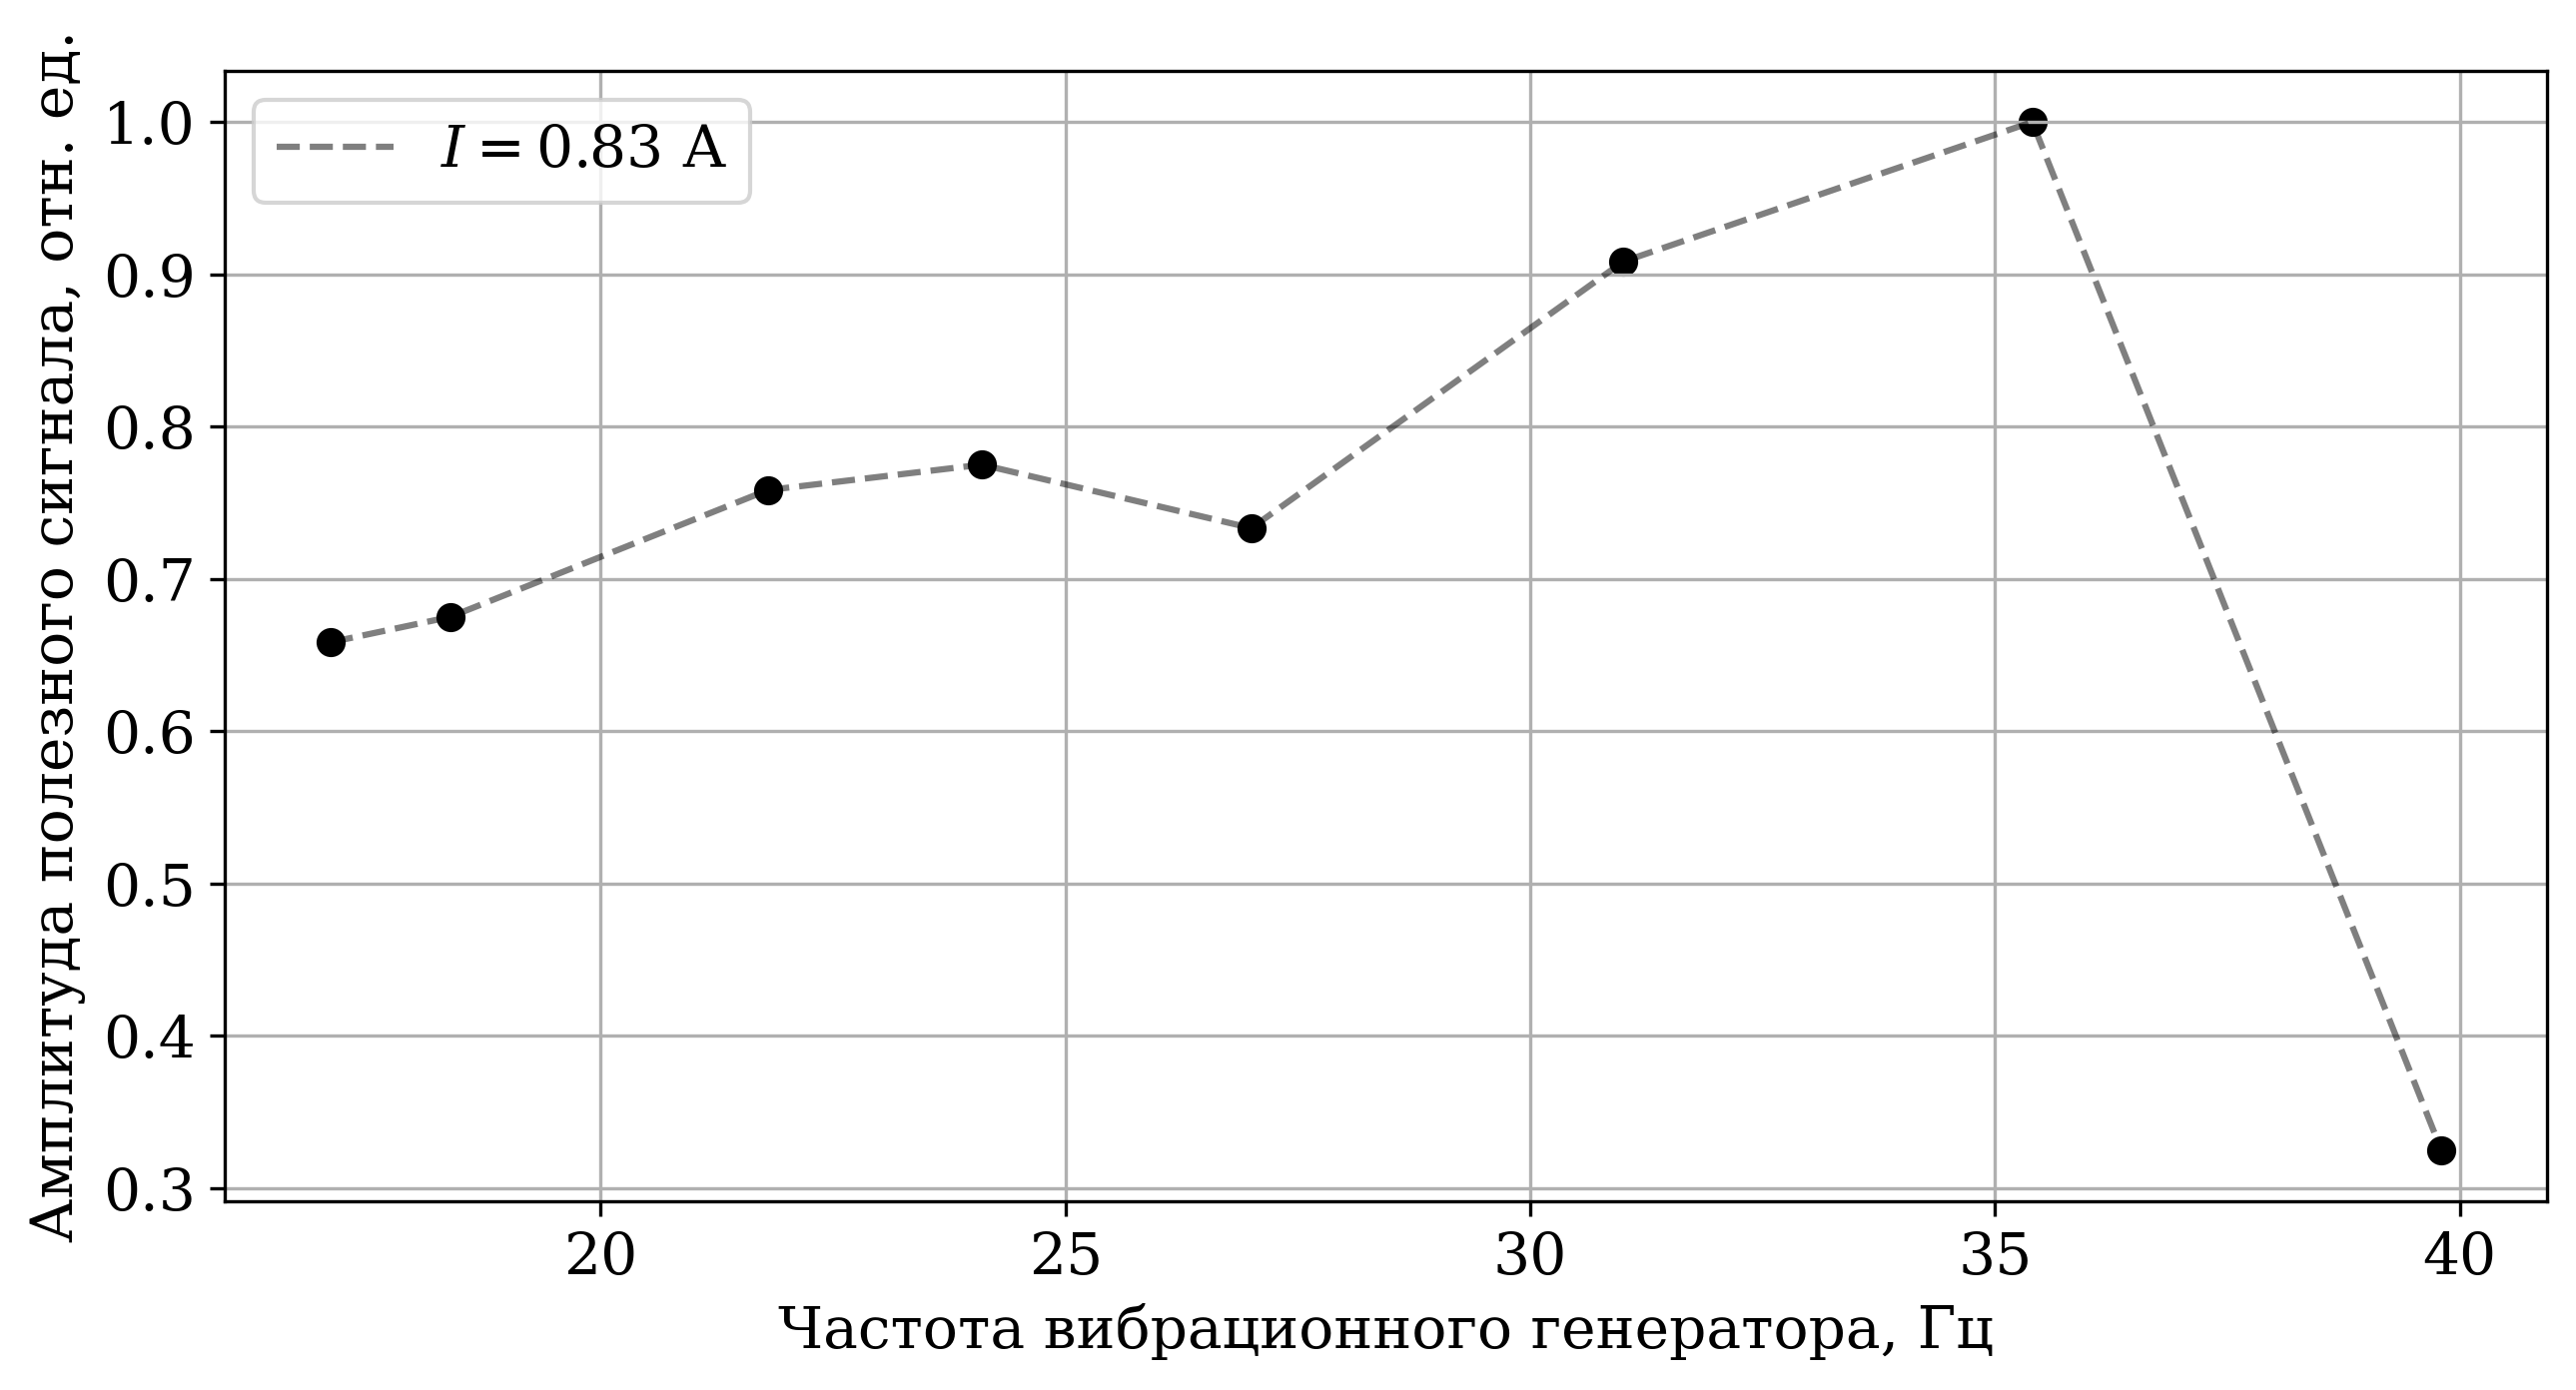

In [60]:
plt.figure(figsize=(10, 5))

x, y = res.f, res.out
y = y / np.max(y)

plt.scatter(x, y, color="black")
plt.plot(x, y, color="black", alpha=0.5, ls="--", label="$I = 0.83$ А")

plt.xlabel("Частота вибрационного генератора, Гц")
plt.ylabel("Амплитуда полезного сигнала, отн. ед.")
plt.legend()

plt.savefig("plot_1.pdf")

In [28]:
hist

,I,out
0,0.04,1.66
1,0.24,3.80
2,0.50,7.30
3,0.75,8.80
4,1.02,12.20
5,1.28,18.00
6,1.51,25.00
7,1.72,20.00
8,1.98,30.00
9,2.30,31.00


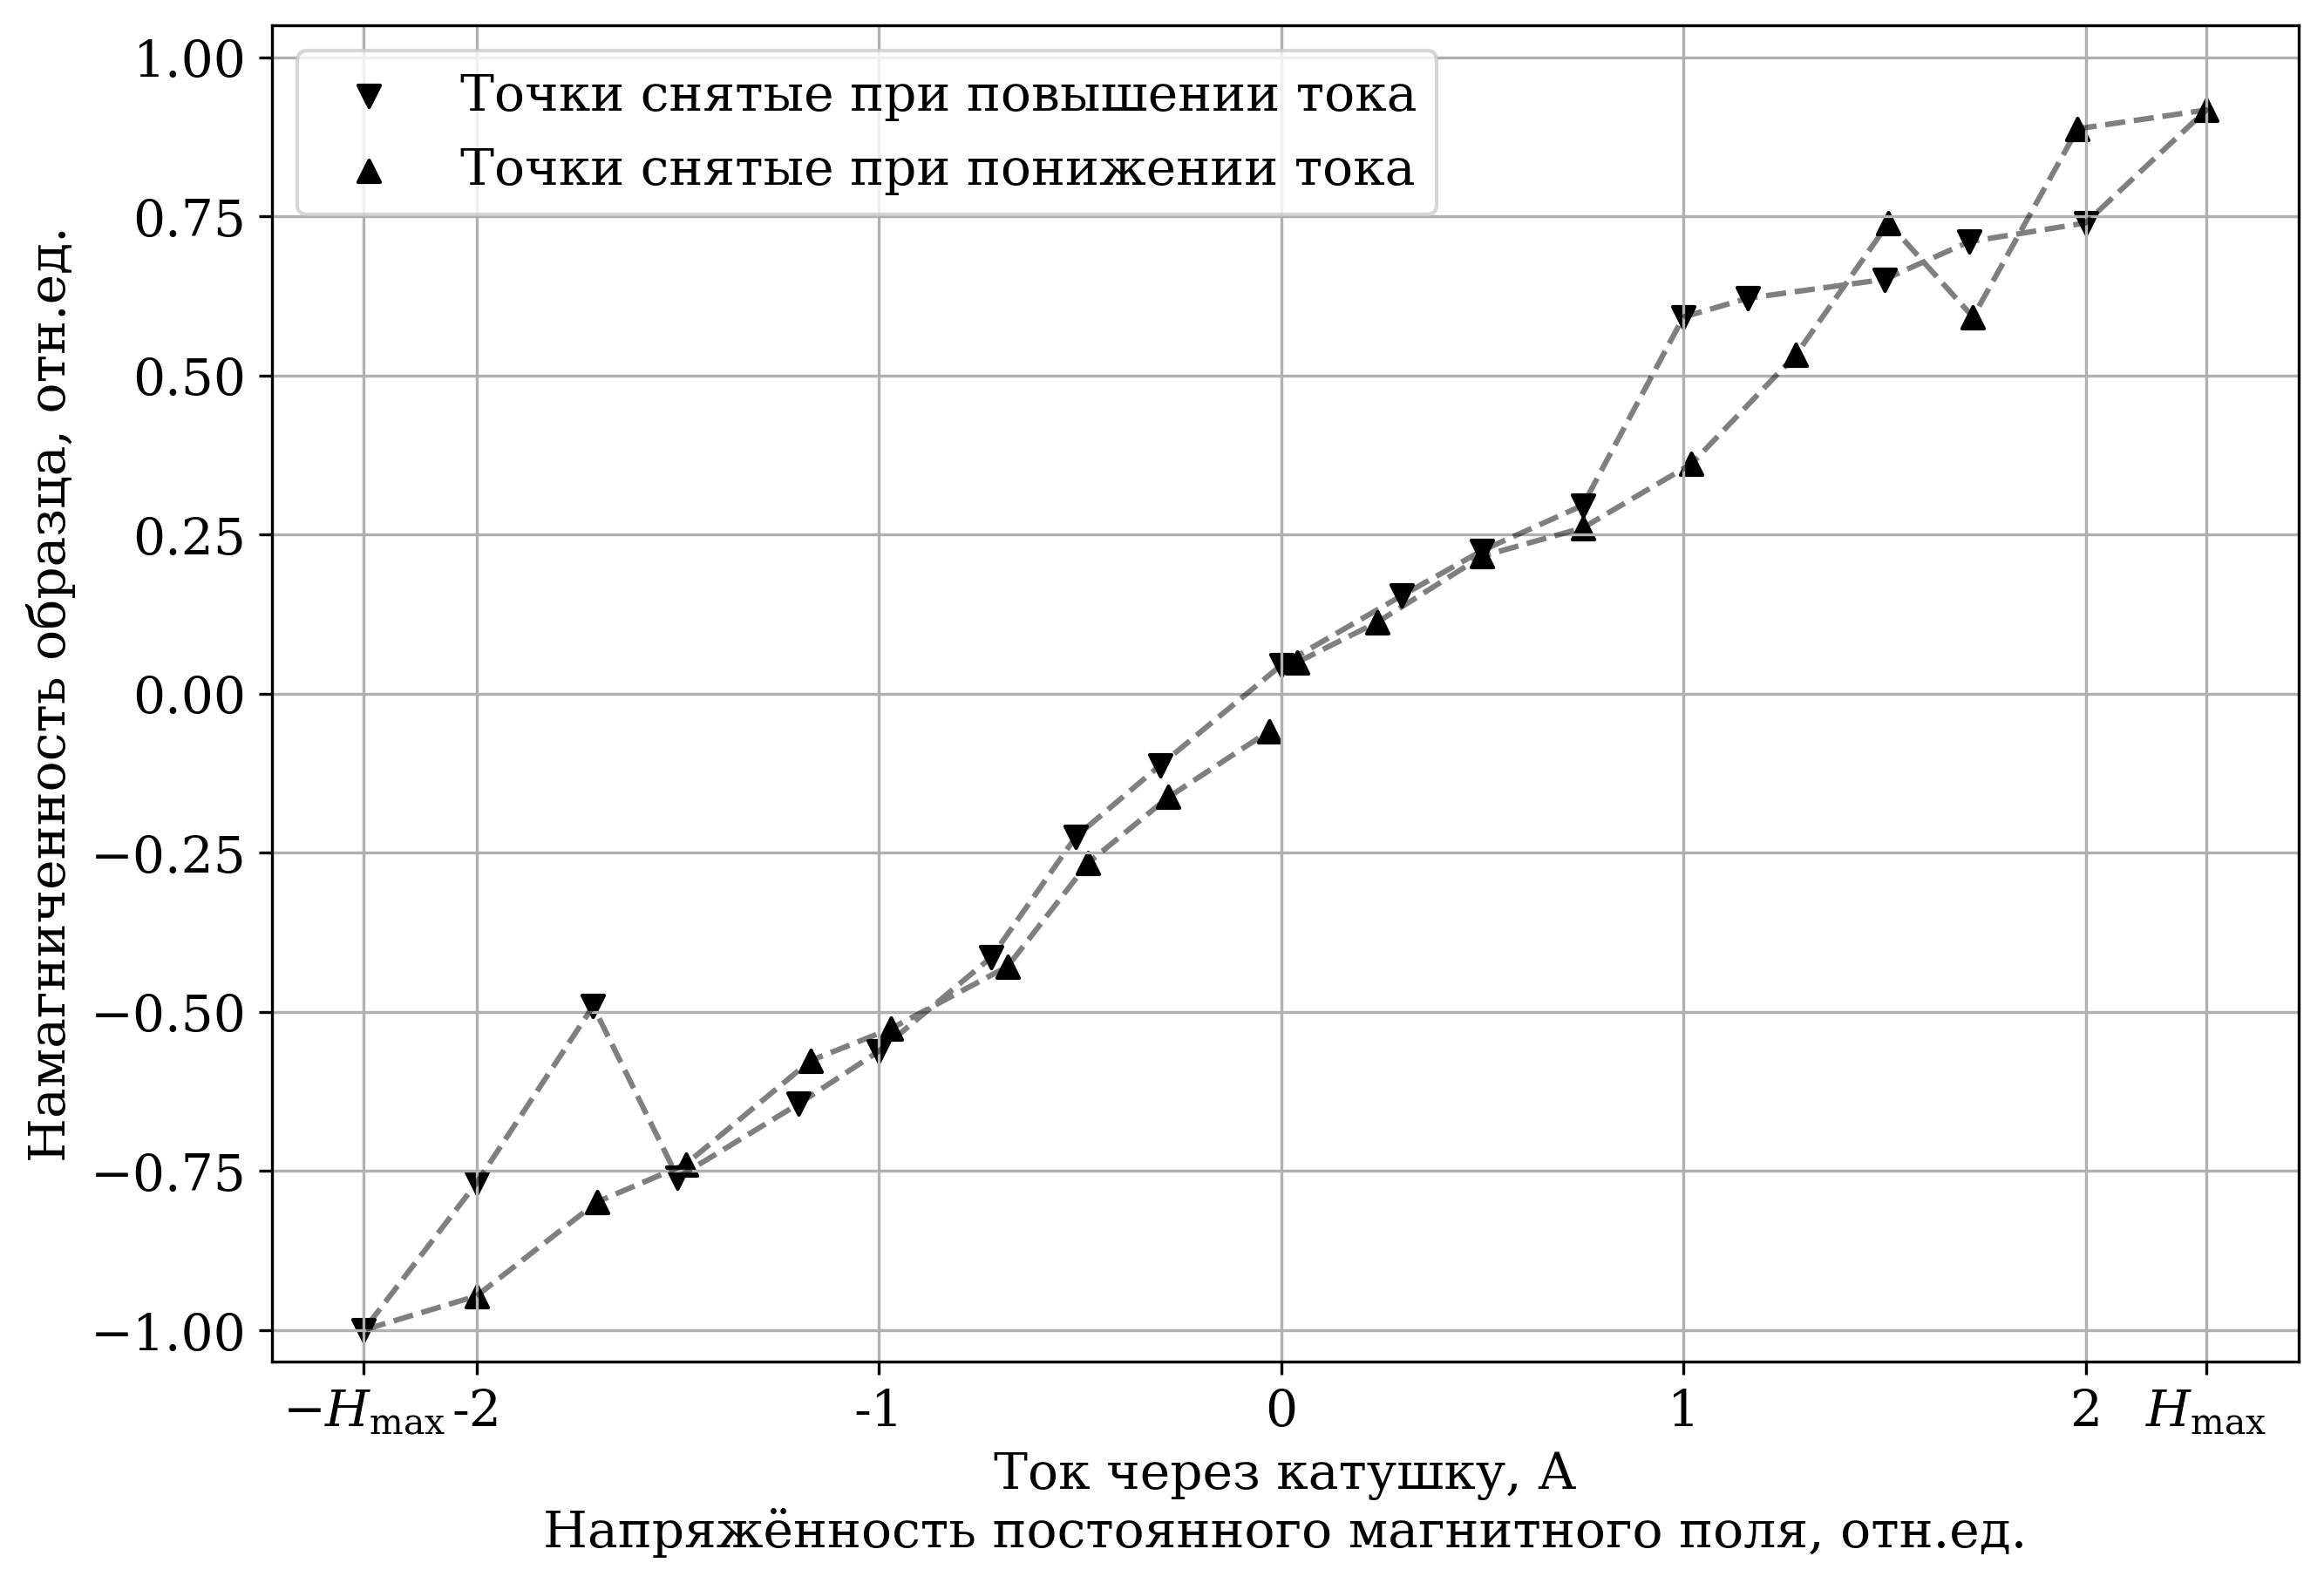

In [81]:
plt.figure(figsize=(10, 7))


x, y = hist.I, hist.out
y = y / np.max(np.abs(y))
dn, up = 10, 28
x_dn, y_dn = x[dn:up], y[dn:up]
x_up, y_up = np.append(x[up:], x[:dn]), np.append(y[up:], y[:dn])
# x_up, y_up = x[up:dn], y[up:dn]1

plt.scatter(x_dn, y_dn, color="black", marker="v", label="Точки снятые при повышении тока")
plt.scatter(x_up, y_up, color="black", marker="^", label="Точки снятые при понижении тока")
plt.plot(x, y, color="black", ls="--", alpha=0.5)

plt.ylim((-1.05, 1.05))

plt.xticks([i for i in range(-2, 3)] + [np.max(x), np.min(x)], [i for i in range(-2, 3)] + ["$H_\max$","$-H_\max$"])

plt.xlabel("Ток через катушку, А\nНапряжённость постоянного магнитного поля, отн.ед.")
plt.ylabel("Намагниченность образца, отн.ед.")
plt.legend()

plt.gcf().subplots_adjust(bottom=0.15)

plt.savefig("plot_2.pdf")